<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing numpy library
import numpy as np
# Setting random seed to 0
np.random.seed(0)

This setting of the random seed ensures that any randomly generated variables in the rest of the code are the same each time i.e. repeatable. This should be done for all tutorials unless otherwise specified

In [19]:
# Importing sklearn library and datasets from that library
import sklearn
from sklearn import datasets
# Creating a dummy dataset
X, y = sklearn.datasets.make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0)

This has created a dataset of 100 samples and 2 features, so each sample has two pieces of information associated with it. By setting the number of informative features to 2 and redundant to 0 we are saying that every piece of information each sample comes with has an impact on the output.

In [20]:
# Manipulating the inputs of the dataset to conform to the tutorial question
X[:, 0] = np.abs(X[:, 0] * 0.5 + 5)
X[:, 1] = np.abs(X[:, 1] * 30 + 160)

Here we are manipulating the inputs we randomly generated to conform with the tutorial question, the first column is crack defect length in mm and the second column is brightness of the crack.

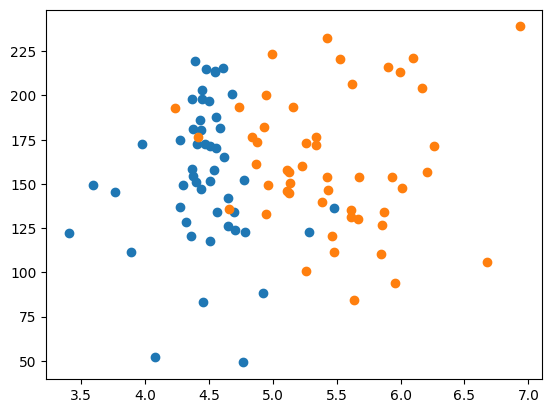

In [24]:
# Importing the plotting library
import matplotlib.pyplot as plt
# Plotting the two separate classes of inputs on the same axis, x axis is first column of input
# (crack length) and the y axis is the second column (Crack brightness)
fig , ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

Here we have potted the inputs, the two class being separated into two different colours